Notes:

*(1-7-2024)* AnovaRM was used by Phind, but actually it looks like pingouin has better ANOVA implementation: https://pingouin-stats.org/build/html/index.html

In [2]:
# Imports for analyzing and visualizing data
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

In [3]:
# Set seed for reproducibility
np.random.seed(42)
rng = np.random.default_rng() # create random number Generator

# Number of subjects
n_subjects = 15

# Data parameters
meas_var = 0.3

# Define the levels of factors A and B
levels_A = ['Normal', 'Bold', 'Bold-Italic']

A_effect = np.array([2, 5, 6]) # defines the effect
print(A_effect)
sbj_effect = rng.random(n_subjects) # variation across subjects
meas = np.outer(sbj_effect,A_effect) + rng.standard_normal(size=(n_subjects,len(levels_A)))*meas_var
meas = meas.clip(min=0) # make the minimum value = 0

# Generate random data
data = {
    'subject': np.repeat(np.arange(n_subjects), len(levels_A)),
    'factor': np.tile(levels_A, n_subjects),
    'words': np.reshape(meas,n_subjects*len(levels_A))
}

# Create a DataFrame
df = pd.DataFrame(data)

# Randomly shift the values for each subject so there are clear differences between them

print(df)


[2 5 6]
    subject       factor     words
0         0       Normal  1.808718
1         0         Bold  3.729063
2         0  Bold-Italic  3.409020
3         1       Normal  0.733332
4         1         Bold  3.386175
5         1  Bold-Italic  2.894368
6         2       Normal  0.890255
7         2         Bold  2.200908
8         2  Bold-Italic  2.830880
9         3       Normal  1.099812
10        3         Bold  2.910133
11        3  Bold-Italic  3.574814
12        4       Normal  1.369967
13        4         Bold  3.717615
14        4  Bold-Italic  5.105051
15        5       Normal  1.734857
16        5         Bold  3.437272
17        5  Bold-Italic  4.411165
18        6       Normal  0.316053
19        6         Bold  1.035739
20        6  Bold-Italic  1.459453
21        7       Normal  1.541465
22        7         Bold  3.803920
23        7  Bold-Italic  4.046823
24        8       Normal  0.511312
25        8         Bold  2.139052
26        8  Bold-Italic  2.687234
27        9 

c:\Users\zsxbo\Projects\stats-visualizations\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zsxbo\Projects\stats-visualizations\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zsxbo\Projects\stats-visualizations\.conda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zsxbo\Projects\stats-visualizations\.conda\Lib\site-packages\seab

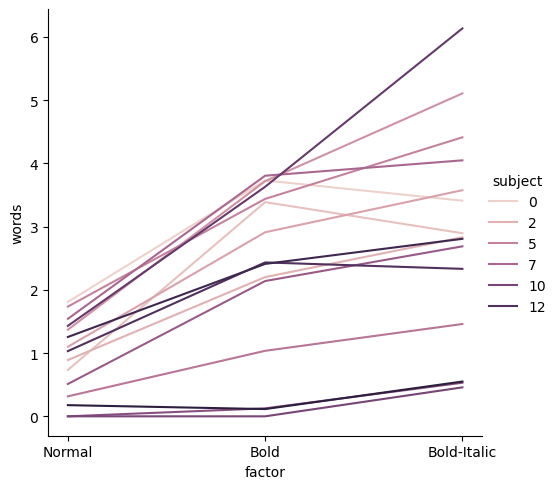

In [4]:
# Plotting
g = sns.relplot(df, x="factor", y="words", hue="subject", kind="line")
g.savefig('../fig/rmANOVA_example.png')

In [9]:
# Calculate rmANOVA
mdl = AnovaRM(df,depvar='words',subject='subject',within=['factor'])
res = mdl.fit()
print(res.summary())

               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
factor 33.8738 2.0000 28.0000 0.0000



In [ ]:
# Calculate the mean squared error of the within-subject effect

# Calculate the mean squared error of the within-subject error
### This is the error calculated after partialling out the between-subject variability (mean squared)



In [ ]:
# Calculate the F-statistic

# Plot the F-statistic labeled on the F distribution

# Indicate the area used to calculate p-value